In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix
import matplotlib.mlab as mlab
%matplotlib inline
from sklearn import metrics
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier

ModuleNotFoundError: No module named 'statsmodels'

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold

ModuleNotFoundError: No module named 'imblearn'

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
#from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
#from imblearn.over_sampling import SMOTE
#from imblearn.under_sampling import NearMiss
#from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

In [6]:
data = {'Age':[34,48,28,56,65], 'y':[0,1,0,1,1], 'yp':[0.25,0.85,0.1,0.9,0.88]} 

In [7]:
a = pd.DataFrame(data)

In [9]:
a

,Age,y,yp
0,34,0,0.25
1,48,1,0.85
2,28,0,0.10
3,56,1,0.90
4,65,1,0.88


In [11]:
import sklearn

In [16]:
sklearn.metrics.log_loss(a['y'],a['yp'])

0.15775108095501866

In [18]:
-(np.log(0.75) + np.log(0.85) + np.log(0.90) + np.log(0.90) + np.log(0.88))/5

0.15775108095501866

In [6]:
train = pd.read_csv("F:Train.csv")

In [7]:
train

,grade_A_Component_1,grade_A_Component_2,max_luminosity,thickness,xmin,xmax,ymin,ymax,pixel_area,log_area,x_component_1,x_component_2,x_component_3,x_component_4,x_component_5,class
0,0,1,150,36,144,172,947225,947332,439,439.099273,0,0,1,0,0,1
1,1,0,134,55,1144,1152,2379058,2379624,329,329.205616,1,0,0,0,0,1
2,1,0,135,65,950,974,1038442,1036754,300,300.120598,0,0,0,0,0,2
3,0,1,123,35,41,220,1705580,1705604,6803,6803.778622,0,0,1,0,0,1
4,1,0,138,69,462,466,1088124,1086579,251,251.401943,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1353,0,1,133,37,583,599,54808,55435,319,319.230467,0,0,0,0,0,1
1354,0,1,145,35,1169,1192,293279,293314,467,467.349309,0,0,0,0,0,2
1355,0,1,145,47,1197,1203,818707,818988,316,316.449571,0,0,0,1,0,1
1356,1,0,126,84,651,672,2162298,2162999,122,122.518578,0,0,0,0,0,2


In [8]:
train['class'].replace({1:0,2:1},inplace = True)

In [9]:
train.shape

(1358, 16)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1358 entries, 0 to 1357
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   grade_A_Component_1  1358 non-null   int64  
 1   grade_A_Component_2  1358 non-null   int64  
 2   max_luminosity       1358 non-null   int64  
 3   thickness            1358 non-null   int64  
 4   xmin                 1358 non-null   int64  
 5   xmax                 1358 non-null   int64  
 6   ymin                 1358 non-null   int64  
 7   ymax                 1358 non-null   int64  
 8   pixel_area           1358 non-null   int64  
 9   log_area             1358 non-null   float64
 10  x_component_1        1358 non-null   int64  
 11  x_component_2        1358 non-null   int64  
 12  x_component_3        1358 non-null   int64  
 13  x_component_4        1358 non-null   int64  
 14  x_component_5        1358 non-null   int64  
 15  class                1358 non-null   i

In [9]:
train.describe()

,grade_A_Component_1,grade_A_Component_2,max_luminosity,thickness,xmin,xmax,ymin,ymax,pixel_area,log_area,x_component_1,x_component_2,x_component_3,x_component_4,x_component_5,class
count,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1.358000e+03,1.358000e+03,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000
mean,0.406480,0.593520,137.893225,78.977909,567.370398,614.032401,1.660107e+06,1.660139e+06,1903.402798,1903.896240,0.081738,0.106038,0.197349,0.035346,0.027982,0.346834
std,0.491357,0.491357,20.480512,55.324842,522.013094,500.505513,1.778153e+06,1.778177e+06,3839.156721,3839.163241,0.274066,0.308000,0.398145,0.184721,0.164983,0.476138
min,0.000000,0.000000,71.000000,35.000000,0.000000,4.000000,7.527000e+03,7.453000e+03,3.000000,3.445293,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,127.000000,42.000000,53.000000,192.000000,4.662742e+05,4.666918e+05,234.000000,234.335948,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,137.000000,66.000000,407.500000,457.000000,1.216168e+06,1.214700e+06,346.000000,346.044490,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,146.000000,83.000000,1041.750000,1064.000000,2.210012e+06,2.210076e+06,915.250000,915.367817,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,266.000000,305.000000,1692.000000,1717.000000,1.291748e+07,1.291731e+07,37392.000000,37392.672970,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [135]:
train.isnull().sum()

grade_A_Component_1    0
grade_A_Component_2    0
max_luminosity         0
thickness              0
xmin                   0
xmax                   0
ymin                   0
ymax                   0
pixel_area             0
log_area               0
x_component_1          0
x_component_2          0
x_component_3          0
x_component_4          0
x_component_5          0
class                  0
dtype: int64

In [222]:
print(train['log_area'].quantile(0.05))
print(train['log_area'].quantile(0.95))

106.51897817920923
10496.970966287901


In [210]:
train["thickness"] = np.where(train["thickness"] <36.0,36.0,train['thickness'])
train["thickness"] = np.where(train["thickness"] >201.0, 201.0,train['thickness'])
print(train['thickness'].skew())

1.6249031848220015


In [215]:
train["ymin"] = np.where(train["ymin"] <81528.40000000001,81528.40000000001,train['ymin'])
train["ymin"] = np.where(train["ymin"] >4573993.499999995,4573993.499999995,train['ymin'])
print(train['ymin'].skew())

0.9495939919284625


In [ ]:
train["max_luminosity"] = np.where(train["max_luminosity"] <108.0,108.0,train['max_luminosity'])
train["max_luminosity"] = np.where(train["max_luminosity"] >167.0, 167.0,train['max_luminosity'])
print(train['max_luminosity'].skew())

In [217]:
train["ymax"] = np.where(train["ymax"] <80992.65000000001,80992.65000000001,train['ymax'])
train["ymax"] = np.where(train["ymax"] >4573542.149999996, 4573542.149999996,train['ymax'])
print(train['ymax'].skew())

0.9493733554173642


In [221]:
train["pixel_area"] = np.where(train["pixel_area"] <106.0,106.0,train['pixel_area'])
train["pixel_area"] = np.where(train["pixel_area"] >10496.549999999965,10496.549999999965,train['pixel_area'])
print(train['pixel_area'].skew())

2.089666206612987


In [223]:
train["log_area"] = np.where(train["log_area"] <106.51897817920923,106.51897817920923,train['log_area'])
train["log_area"] = np.where(train["log_area"] >10496.970966287901, 10496.970966287901,train['log_area'])
print(train['log_area'].skew())

2.0896498796101386


In [184]:
train['xmax'].skew()

0.541422458205447

In [109]:
a = train

In [110]:
a.head()

,grade_A_Component_1,grade_A_Component_2,max_luminosity,thickness,xmin,xmax,ymin,ymax,pixel_area,log_area,x_component_1,x_component_2,x_component_3,x_component_4,x_component_5,class
0,0,1,150.0,38.0,144,172,947225.0,947332.0,439.0,439.099273,0,0,1,0,0,0
1,1,0,134.0,55.0,1144,1152,2379058.0,2379624.0,329.0,329.205616,1,0,0,0,0,0
2,1,0,135.0,65.0,950,974,1038442.0,1036754.0,300.0,300.120598,0,0,0,0,0,1
3,0,1,123.0,38.0,41,220,1705580.0,1705604.0,6425.1,6425.833214,0,0,1,0,0,0
4,1,0,138.0,69.0,462,466,1088124.0,1086579.0,251.0,251.401943,0,0,0,0,0,1


In [ ]:
max_luminosity = 56(0.05,0.95), thickness = 161(0.15,0,85), ymin = 53(0.85), ymax = 53(0.85), pixel area = 271, log_area = 272

In [85]:
train['x_component_2'].value_counts()

0    1214
1     144
Name: x_component_2, dtype: int64

In [ ]:
train['class'].value_counts()

In [ ]:
sn.countplot(x='class',data=train)

In [ ]:
categorical = train.select_dtypes(include=['object'])
categorical

In [ ]:
train['max_luminosity'].skew()

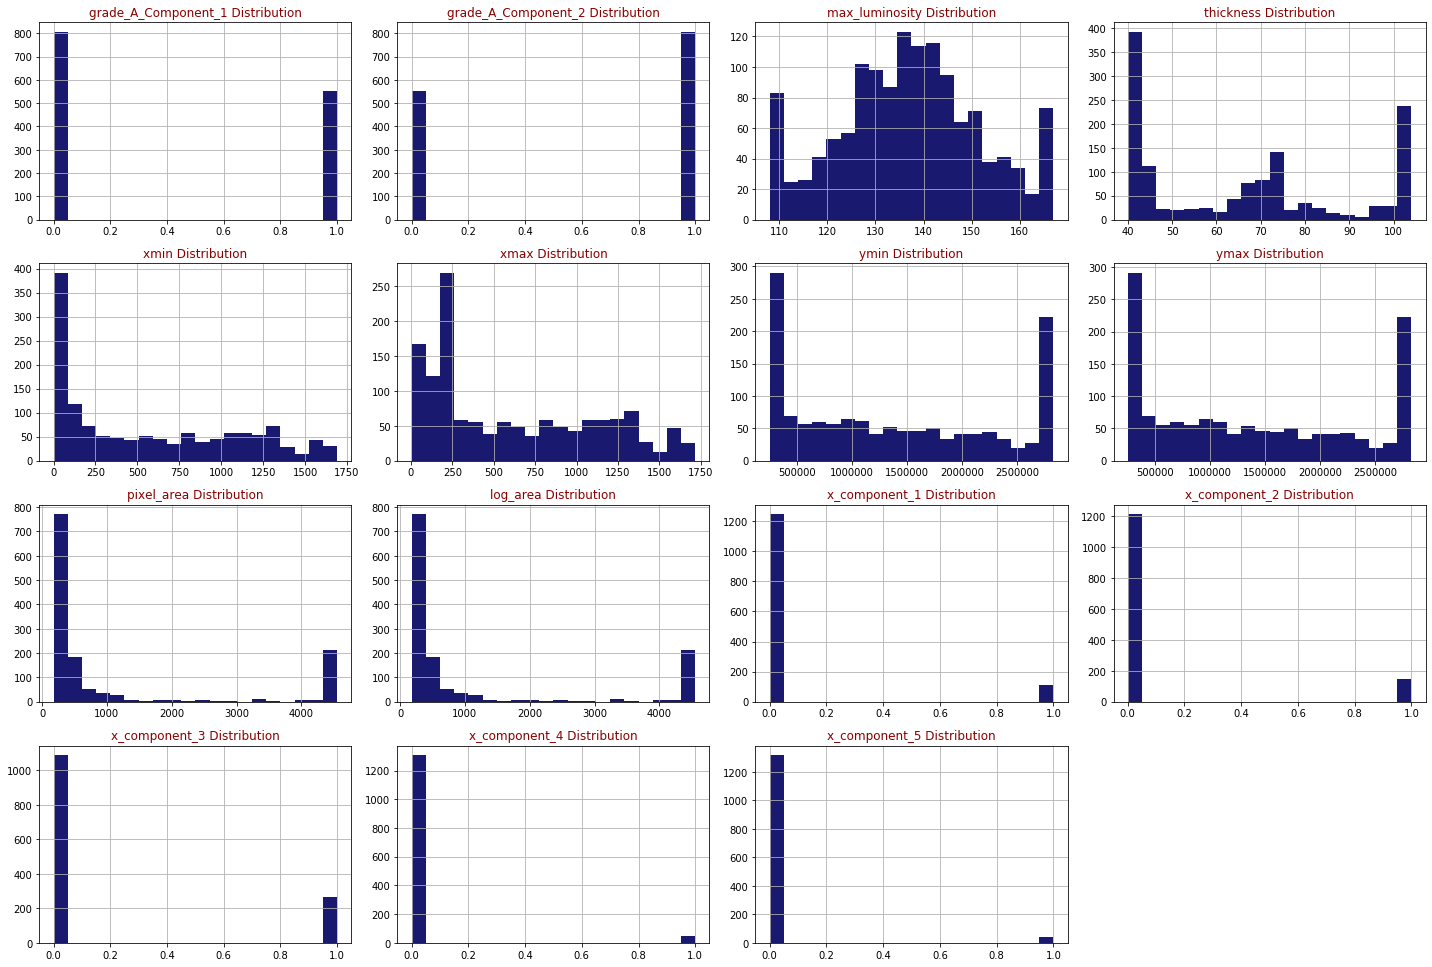

In [186]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(X,X.columns,6,4)

In [ ]:

plt.figure(figsize= (20, 10))
sns.heatmap(train.corr(),annot = True)

In [ ]:
train.columns

In [10]:
X = train.drop('class', axis=1)
y = train['class']

In [ ]:
from sklearn.preprocessing import StandardScaler
features = ['grade_A_Component_1', 'grade_A_Component_2', 'max_luminosity',
       'thickness', 'xmin', 'xmax', 'ymin', 'ymax', 'pixel_area', 'log_area',
       'x_component_1', 'x_component_2', 'x_component_3', 'x_component_4',
       'x_component_5']
# Separating out the features
X = train.loc[:, features].values
# Separating out the target
y = train.loc[:,['class']].values
# Standardizing the features
X = StandardScaler().fit_transform(X)

In [ ]:
y.value_counts()

In [11]:
X['thickness'] = np.sqrt(X['thickness'])

In [12]:
X['xmin'] = np.sqrt(X['xmin'])

In [13]:
X['xmax'] = np.sqrt(X['xmax'])

In [14]:
X['ymin'] = np.sqrt(X['ymin'])

In [15]:
X['ymax'] = np.sqrt(X['ymax'])

In [ ]:
X['ymax'].skew()

In [ ]:
t['thickness'] = np.sqrt(t['thickness'])

In [ ]:
t['xmin'] = np.sqrt(t['xmin'])

In [ ]:
t['xmax'] = np.sqrt(t['xmax'])

In [ ]:
t['ymin'] = np.sqrt(t['ymin'])

In [ ]:
t['ymax'] = np.sqrt(t['ymax'])

In [ ]:
X

In [225]:
from imblearn.over_sampling import RandomOverSampler

In [226]:
os =RandomOverSampler(1)

In [227]:
X, y = os.fit_sample(X, y)

In [ ]:
X

In [ ]:
X.shape

In [ ]:
a = pd.DataFrame(y)

In [ ]:
y[y == 1]

In [ ]:
X.shape

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
X_train.shape

In [ ]:
X_test.shape

In [33]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(penalty = 'l2',solver = 'liblinear',random_state = 1) 
logreg.fit(X_train,Y_train) 
print(logreg.score(X_test,Y_test))
  

0.6348039215686274


In [27]:
import sklearn

0.6274509803921569

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,predictions)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [ ]:

TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

In [ ]:
TN+FP

In [ ]:
print('The acuuracy of the model = TP+TN / (TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n\n',

'The Miss-classification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n\n',

'Sensitivity or True Positive Rate = TP / (TP+FN) = ',TP/float(TP+FN),'\n\n',

'Specificity or True Negative Rate = TN / (TN+FP) = ',TN/float(TN+FP),'\n\n',

'Positive Predictive value = TP / (TP+FP) = ',TP/float(TP+FP),'\n\n',

'Negative predictive Value = TN / (TN+FN) = ',TN/float(TN+FN),'\n\n',

'Positive Likelihood Ratio = Sensitivity / (1-Specificity) = ',sensitivity/(1-specificity),'\n\n',

'Negative likelihood Ratio = (1-Sensitivity) / Specificity = ',(1-sensitivity)/specificity)


In [ ]:
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

In [ ]:
from sklearn.preprocessing import binarize
for i in range(1,5):
    cm2=0
    y_pred_prob_yes=logreg.predict_proba(X_test)
    y_pred2=binarize(y_pred_prob_yes,i/10)[:,1]
    cm2=confusion_matrix(Y_test,y_pred2)
    print ('With',i/10,'threshold the Confusion Matrix is ','\n',cm2,'\n',
            'with',cm2[0,0]+cm2[1,1],'correct predictions and',cm2[1,0],'Type II errors( False Negatives)','\n\n',
          'Sensitivity: ',cm2[1,1]/(float(cm2[1,1]+cm2[1,0])),'Specificity: ',cm2[0,0]/(float(cm2[0,0]+cm2[0,1])),'\n\n\n')

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_prob_yes[:,1])
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for logistic classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

In [ ]:
sklearn.metrics.roc_auc_score(Y_test, y_pred_prob_yes[:,1])

In [ ]:
sklearn.metrics.log_loss(Y_test, y_pred_prob_yes[:,1])

### Decision Tree

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


In [ ]:
giniDecisionTree = DecisionTreeClassifier(criterion='gini',random_state = 100,max_depth=5, min_samples_leaf=5)

giniDecisionTree.fit(X_train, Y_train)

In [ ]:
giniPred = giniDecisionTree.predict(X_test) 

In [ ]:
print('Accuracy Score: ',accuracy_score(Y_test, giniPred))

In [ ]:
print('Classification Report')
print(classification_report(Y_test, giniPred))

### RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split, GridSearchCV

In [ ]:
fit_rf = RandomForestClassifier(random_state=100)

In [39]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
import time
import random
np.random.seed(100)
start = time.time()

parameters = {'max_depth': [2, 3, 4,5,6,7,8],'bootstrap': [True, False],'max_features': ['auto', 'sqrt', 'log2', None],'criterion': ['gini', 'entropy']}

cv_rf = RandomizedSearchCV(fit_rf,parameters, n_jobs = 4,scoring="neg_log_loss")



cv_rf.fit(X_train, Y_train)
print('Best Parameters using grid search: \n', cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

In [ ]:
fit_rf.set_params(criterion = 'entropy',max_features='auto',max_depth = 7,bootstrap = 'True',min_samples_leaf=6)

In [ ]:
fit_rf.set_params(n_estimators=1000,
                  warm_start=False, 
                  oob_score=False)

In [ ]:
fit_rf.fit(X_train, Y_train)

In [ ]:
predictions_rf = fit_rf.predict(X_test)

In [ ]:
print('Accuracy Score: ',accuracy_score(Y_test, predictions_rf))

In [ ]:
y_pred_prob_yes=fit_rf.predict_proba(X_test)

In [ ]:
import sklearn

In [ ]:
sklearn.metrics.roc_auc_score(Y_test, y_pred_prob_yes[:,1])

In [ ]:
sklearn.metrics.log_loss(Y_test, y_pred_prob_yes[:,1])

In [ ]:
err = []
logloss = []
y_pred_tot_lgm = []
from sklearn.model_selection import StratifiedKFold

fold = StratifiedKFold(n_splits=3)
i = 1
for train, test in fold.split(X, y):
    
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3)
    m = RandomForestClassifier(criterion = 'entropy',max_features='auto',max_depth = 7,bootstrap = 'True',min_samples_leaf=6,warm_start=False,oob_score=False,n_estimators=1000)
    m.fit(x_train, y_train)
          
    pred_y = m.predict_proba(x_val)[:,1]
    print("err_lgm: ",roc_auc_score(y_val,pred_y))
    err.append(roc_auc_score(y_val, pred_y))
    

In [ ]:
np.mean(err,0)

In [ ]:
y_pred_prob_yes=fit_rf.predict_proba(test)[:,:]
y_pred_prob_df=pd.DataFrame(data=y_pred_prob_yes, columns=['0','1'])
y_pred_prob_df

In [ ]:
y_pred_prob_df.to_excel('E:/sub_2.xlsx',index=False)

### XGBoost

In [23]:
import xgboost as xgb

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

clf = xgb.XGBClassifier()
parameters = {
     "eta"    : [0.01 ,0.02 ,0.03,0.04,0.05 ] ,
     "max_depth"        : [ 3, 4, 5, 6, 8, 10,13],
     "min_child_weight" : [ 1, 3, 5, 7 ],
     "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
     "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ],
    "scale_pos_weight" : [1,10,25,50,75,99,100]
     }

grid = RandomizedSearchCV(clf,
                    parameters, n_jobs=4,
                    scoring="neg_log_loss",
                    cv=5)

grid.fit(X_train, Y_train)


print('Best Parameters using grid search: \n', grid.best_params_)

### Bayesian

In [ ]:

from bayes_opt import BayesianOptimization

In [ ]:
def bayesian_optimization(train, function, parameters):
    
    X_train, y_train, X_test, y_test = train
    n_iterations = 5
    gp_params = {"alpha": 1e-4}

    BO = BayesianOptimization(function, parameters)
    BO.maximize(n_iter=n_iterations, **gp_params)

    return BO.max

In [ ]:
 def xgb_optimization(cv_splits, eval_set):
    def function(eta, gamma, max_depth):
            return cross_val_score(
                   xgb.XGBClassifier(
                       objective="binary:logistic",
                       learning_rate=max(eta, 0),
                       gamma=max(gamma, 0),
                       max_depth=int(max_depth),                                               
                       seed=42,
                       nthread=-1,
                       scale_pos_weight = len(y_train[y_train == 0])/
                                          len(y_train[y_train == 1])),  
                   X=X_train, 
                   y=y_train, 
                   cv=cv_splits,
                   scoring="roc_auc",
                   fit_params={
                        "early_stopping_rounds": 10, 
                        "eval_metric": "auc", 
                        "eval_set": eval_set},
                   n_jobs=-1).mean()

    parameters = {"eta": (0.001, 0.4),
                  "gamma": (0, 20),
                  "max_depth": (1, 2000)}
    
    return function, parameters

In [ ]:
y_pred_prob_yes=model.predict_proba(X_test)

In [ ]:
sklearn.metrics.roc_auc_score(Y_test, y_pred_prob_yes[:,1])

In [ ]:
sklearn.metrics.log_loss(Y_test, y_pred_prob_yes[:,1])

In [ ]:
y_pred_prob_yes=model.predict_proba(test)[:,:]
y_pred_prob_df=pd.DataFrame(data=y_pred_prob_yes, columns=['0','1'])
y_pred_prob_df.head(50)

In [ ]:
y_pred_prob_df.to_excel('E:/sub_18.xlsx',index=False)

### XGB

In [ ]:
clf = xgb.XGBClassifier(min_child_weight=1, max_depth= 10, gamma= 0.2, eta=0.02, colsample_bytree=0.7,n_estimators=1000,random_state = 42,booster = 'gbtree',scale_pos_weight= 10)
#'scale_pos_weight': 10, 'min_child_weight': 1, 'max_depth': 10, 'gamma': 0.2, 'eta': 0.02, 'colsample_bytree': 0.7

In [ ]:
clf.fit(X_train,Y_train)

In [ ]:
'scale_pos_weight': 1, 'min_child_weight': 5, 'max_depth': 3, 'gamma': 0.1, 'eta': 0.04, 'colsample_bytree': 0.7

In [ ]:
#{'min_child_weight': 1, 'max_depth': 3, 'gamma': 0.2, 'eta': 0.15, 'colsample_bytree': 0.5,n_estimators=100,random_state = 42} #945,280

In [ ]:
predictions = clf.predict(X_test)

In [ ]:
y_pred_prob_yes=clf.predict_proba(X_test)

In [ ]:
sklearn.metrics.roc_auc_score(Y_test, y_pred_prob_yes[:,1])

In [ ]:
sklearn.metrics.log_loss(Y_test, y_pred_prob_yes[:,1])

In [ ]:
y_pred_prob_yes=clf.predict_proba(t)[:,:]
y_pred_prob_df=pd.DataFrame(data=y_pred_prob_yes, columns=['0','1'])
y_pred_prob_df.head()

In [ ]:
y_pred_prob_df.to_excel('E:/sub_96.xlsx',index=False)

### LGBM

In [36]:
import lightgbm as lgb

In [ ]:
model = lgb.LGBMClassifier(n_estimators=10000, objective = 'binary', 
                                   class_weight = 'balanced', n_jobs = -1, random_state = 50 ,eval_metric='logloss',bagging_fraction = 0.8,bagging_freq = 1,subsample=0.7,max_depth= 10,learning_rate=0.001,feature_fraction=0.8,colsample_bytree=0.6,boosting_type='gbdt')

In [57]:
model = lgb.LGBMClassifier(n_estimators=10000, objective = 'binary', 
                                   class_weight = 'balanced', n_jobs = -1, random_state = 50 ,eval_metric='logloss',bagging_fraction = 0.8,bagging_freq = 1,subsample= 0.9,max_depth=10,learning_rate=0.001,feature_fraction=0.8,colsample_bytree= 0.8,boosting_type='dart')

In [40]:
parameters = {'learning_rate': [0.001,0.005,0.01,0.03,0.05,0.08],'subsample': [0.6,0.7,0.8,0.9],
              'feature_fraction': [0.6,0.7,0.8,0.9],'max_depth' :[6,7,8,9,10], 'colsample_bytree': [0.5,0.6,0.8],
              'boosting_type':['gbdt','rf','dart']
             }

cv_rf = RandomizedSearchCV(model,parameters, n_jobs = 4,scoring="neg_log_loss")



cv_rf.fit(X_train, Y_train)

RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=LGBMClassifier(bagging_fraction=0.8,
                                            bagging_freq=1,
                                            boosting_type='gbdt',
                                            class_weight='balanced',
                                            colsample_bytree=1.0,
                                            eval_metric='logloss',
                                            importance_type='split',
                                            learning_rate=0.1, max_depth=-1,
                                            min_child_samples=20,
                                            min_child_weight=0.001,
                                            min_split_gain=0.0,
                                            n_estimators=10000, n_j...
                   iid='warn', n_iter=10, n_jobs=4,
                   param_distributions={'boosting_type': ['gbdt', 'rf', 'dar

In [41]:
cv_rf.best_params_

{'subsample': 0.9,
 'max_depth': 10,
 'learning_rate': 0.001,
 'feature_fraction': 0.8,
 'colsample_bytree': 0.8,
 'boosting_type': 'dart'}

In [43]:
model.fit(X_train,Y_train)

LGBMClassifier(bagging_fraction=0.8, bagging_freq=1, boosting_type='dart',
               class_weight='balanced', colsample_bytree=0.8,
               eval_metric='logloss', feature_fraction=0.8,
               importance_type='split', learning_rate=0.001, max_depth=10,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=10000, n_jobs=-1, num_leaves=31, objective='binary',
               random_state=50, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=0.9, subsample_for_bin=200000, subsample_freq=0)

In [44]:
y_pred=model.predict(X_test)

In [45]:
pred=model.predict_proba(X_test)[:,1]

In [46]:
sklearn.metrics.roc_auc_score(Y_test, pred)

0.9575671254512635

In [47]:
sklearn.metrics.log_loss(Y_test, pred)

0.26343631082437313

### CAT boost

In [48]:
from catboost import CatBoostClassifier,Pool

In [49]:
model= CatBoostClassifier(
        iterations=5000,logging_level="Silent",early_stopping_rounds=500,custom_loss=["Logloss"], 
        eval_metric="Logloss",loss_function = 'Logloss',bootstrap_type = 'Bayesian',bagging_temperature = 0.6)

In [50]:
model.fit(  X_train,Y_train,
        eval_set=(X_test,Y_test)
        )

In [51]:
pred=model.predict_proba(X_test)[:,1]

In [52]:
sklearn.metrics.roc_auc_score(Y_test, pred)

0.9655770532490975

In [53]:
sklearn.metrics.log_loss(Y_test, pred)

0.2188477663718476

In [ ]:
from sklearn.preprocessing import StandardScaler
features = ['grade_A_Component_1', 'grade_A_Component_2', 'max_luminosity',
       'thickness', 'xmin', 'xmax', 'ymin', 'ymax', 'pixel_area', 'log_area',
       'x_component_1', 'x_component_2', 'x_component_3', 'x_component_4',
       'x_component_5']
# Separating out the features
Xt = t.loc[:, features].values

# Standardizing the features
Xt = StandardScaler().fit_transform(Xt)

In [238]:
t = pd.read_csv("F:Test.csv")

In [ ]:
y_pred_prob_yes=model.predict_proba(t)[:,:]
y_pred_prob_df=pd.DataFrame(data=y_pred_prob_yes, columns=['1','2'])
y_pred_prob_df.head()

In [ ]:
y_pred_prob_df.to_excel('E:/predict3.xlsx',index=False)

### MLP

In [ ]:
from sklearn.neural_network import MLPClassifier

#Initializing the MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(150,100,10), 
                           max_iter=1000,activation = 'relu',solver='sgd',random_state=100)

In [ ]:
mlp.fit(X_train,Y_train)

In [ ]:
pred=mlp.predict_proba(X_test)[:,1]

In [ ]:
sklearn.metrics.roc_auc_score(Y_test, pred)

In [ ]:
sklearn.metrics.log_loss(Y_test, pred)

### Votingclassifier

In [229]:
from sklearn.ensemble import VotingClassifier

In [230]:
from sklearn.model_selection import cross_val_score,KFold

In [ ]:
c= CatBoostClassifier(
        iterations=5000,logging_level="Silent",early_stopping_rounds=500,custom_loss=["AUC"], 
        eval_metric="Logloss",loss_function = 'Logloss',bootstrap_type = 'Bayesian',bagging_temperature = 0.8)

In [231]:
C_1= CatBoostClassifier(
        iterations=5000,logging_level="Silent",early_stopping_rounds=500,custom_loss=["Logloss"], 
        eval_metric="Logloss",loss_function = 'Logloss',bootstrap_type = 'Bayesian',bagging_temperature = 0.6)

In [ ]:
C_2 = xgb.XGBClassifier(min_child_weight=1, max_depth= 8, gamma= 0.3, eta=0.02, colsample_bytree=0.5,n_estimators=100,random_state = 42,booster = 'gbtree',scale_pos_weight= 1)


In [232]:
C_3 = lgb.LGBMClassifier(n_estimators=10000, objective = 'binary', 
                                   class_weight = 'balanced', n_jobs = -1, random_state = 50 ,eval_metric='logloss',bagging_fraction = 0.8,bagging_freq = 1,subsample=0.7,max_depth= 10,learning_rate=0.001,feature_fraction=0.8,colsample_bytree=0.6,boosting_type='gbdt')

In [ ]:
#old p5 C_3 = lgb.LGBMClassifier(n_estimators=10000, objective = 'binary', 
                                   #class_weight = 'balanced', learning_rate = 0.02, 
                                   #reg_alpha = 0.1, reg_lambda = 0.1, 
                                   #subsample = 0.8, n_jobs = -1, random_state = 50,bagging_fraction= 0.8,feature_fraction = 0.8,max_depth = 8,eval_metric='logloss',max_bin = 230,colsample_bytree=0.5)

In [233]:
VC_soft = VotingClassifier(estimators = [('CB',C_1),('LGB',C_3)],voting = 'soft',n_jobs = -1)

In [ ]:
result = pd.DataFrame( index = ['CV_score'])

In [ ]:
result['VC_hard']= cross_val_score(VC_hard,X,y,cv=5,scoring = 'accuracy').mean()

In [ ]:
result['VC_soft']= cross_val_score(VC_soft,X,y,cv=5,scoring = 'neg_log_loss').mean()

In [ ]:
result.T

In [234]:
VC_soft.fit(X_train,Y_train)

VotingClassifier(estimators=[('CB',
                              <catboost.core.CatBoostClassifier object at 0x000002065BAD1388>),
                             ('LGB',
                              LGBMClassifier(bagging_fraction=0.8,
                                             bagging_freq=1,
                                             boosting_type='gbdt',
                                             class_weight='balanced',
                                             colsample_bytree=0.6,
                                             eval_metric='logloss',
                                             feature_fraction=0.8,
                                             importance_type='split',
                                             learning_rate=0.001, max_depth=10,
                                             min_child_samples=20,
                                             min_child_weight=0.001,
                                             min_split_gain=0.0,
             

In [235]:
pred=VC_soft.predict_proba(X_test)[:,1]

In [236]:
sklearn.metrics.roc_auc_score(Y_test, pred)

0.9657707910750507

In [237]:
sklearn.metrics.log_loss(Y_test, pred)

0.22872269411062815

In [ ]:
err = []
a = []
y_pred_tot_lgm = []
from sklearn.model_selection import StratifiedKFold

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit


sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]
    C_1= CatBoostClassifier(
        iterations=5000,logging_level="Silent",early_stopping_rounds=500,custom_loss=["Logloss"], 
        eval_metric="Logloss",loss_function = 'Logloss',bootstrap_type = 'Bayesian',bagging_temperature = 0.6)
    C_3 = lgb.LGBMClassifier(n_estimators=10000, objective = 'binary', 
                                   class_weight = 'balanced', n_jobs = -1, random_state = 50 ,eval_metric='logloss',bagging_fraction = 0.8,bagging_freq = 1,subsample=0.7,max_depth= 10,learning_rate=0.001,feature_fraction=0.8,colsample_bytree=0.6,boosting_type='gbdt')
    m = VotingClassifier(estimators = [('CB',C_1),('LGB',C_3)],voting = 'soft',n_jobs = -1)
    m.fit(original_Xtrain,original_ytrain)
    pred=m.predict_proba(original_Xtest)[:,1]
    
    print("err_lgm: ",roc_auc_score(original_ytest,pred))
    
    r = sklearn.metrics.log_loss(original_ytest, pred)
    a.append(r)
    
    
    
    
    

In [ ]:
np.mean(a,0)

In [ ]:
l = []
a = 5
l.append(a)
l

In [239]:
y_pred_prob_yes=VC_soft.predict_proba(t)[:,:]
y_pred_prob_df=pd.DataFrame(data=y_pred_prob_yes, columns=['1','2'])
y_pred_prob_df.head()

,1,2
0,0.995308,0.004692
1,0.097291,0.902709
2,0.991121,0.008879
3,0.993506,0.006494
4,0.555726,0.444274


In [240]:
y_pred_prob_df.to_excel('E:/predict_60.xlsx',index=False)

In [ ]:
sklearn.metrics.roc_auc_score(Y_test, pred)

In [ ]:
sklearn.metrics.log_loss(Y_test, pred)

In [ ]:
y_pred_prob_yes=VC_soft.predict_proba(test)
y_pred_prob_df=pd.DataFrame(data=y_pred_prob_yes, columns=['0','1'])
y_pred_prob_df

### Stacking

In [ ]:
Clf1 = CatBoostClassifier()
Clf2 = lgb.LGBMClassifier()
sclf = StackingClassifier(classifiers=[Clf1], 
                          meta_classifier=Clf2 )

In [ ]:
Clf1 = CatBoostClassifier(
        iterations=5000,logging_level="Silent",early_stopping_rounds=500,custom_loss=["AUC"], 
        eval_metric="CrossEntropy",loss_function = 'Logloss',bootstrap_type = 'Bayesian',bagging_temperature = 0.8)

In [ ]:
Clf2 = lgb.LGBMClassifier(n_estimators=10000, objective = 'binary', 
                                   class_weight = 'balanced', learning_rate = 0.02, 
                                   reg_alpha = 0.1, reg_lambda = 0.1, 
                                   subsample = 0.8, n_jobs = -1, random_state = 50,bagging_fraction= 0.8,feature_fraction = 0.8,max_depth = 8,eval_metric='logloss',max_bin = 230,colsample_bytree=0.5)

In [ ]:
from mlxtend.classifier import StackingClassifier

In [ ]:
sclf = StackingClassifier(classifiers=[Clf1], 
                          meta_classifier=Clf2 )

In [ ]:
sclf.fit(X_train,Y_train)

In [ ]:
import matplotlib.gridspec as gridspec
import itertools
from sklearn.model_selection import cross_val_score, train_test_split

In [ ]:
%matplotlib inline
import itertools
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from mlxtend.plotting import plot_learning_curves
from mlxtend.plotting import plot_decision_regions
from sklearn.ensemble import AdaBoostClassifier
from mlxtend.classifier import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from warnings import filterwarnings
filterwarnings('ignore')
np.random.seed(0)

In [ ]:
label = ['Xgb', 'Rand','Stacking Classifier']
clf_list = [clf1, clf2,sclf]
    
fig = plt.figure(figsize=(10,8))
gs = gridspec.GridSpec(2, 2)
grid = itertools.product([0,1],repeat=2)

clf_cv_mean = []
clf_cv_std = []
for clf, label, grd in zip(clf_list, label, grid):
        
    scores = cross_val_score(clf, X_train, Y_train, cv=3, scoring='accuracy')
    print ("Accuracy: %.2f (+/- %.2f) [%s]" %(scores.mean(), scores.std(), label))
    clf_cv_mean.append(scores.mean())
    clf_cv_std.append(scores.std())
        
    clf.fit(X_train, Y_train)
    

plt.show()

In [ ]:
pred=sclf.predict_proba(X_test)[:,1]

In [ ]:
sklearn.metrics.roc_auc_score(Y_test, pred)

In [ ]:
sklearn.metrics.log_loss(Y_test, pred)

### Test data

In [ ]:
test = pd.read_csv("D:test.csv")

In [ ]:
test.shape

In [ ]:
test.isnull().sum()

In [ ]:
test.head()

In [ ]:
X.head()

In [ ]:
y_pred_prob_yes=clf.predict_proba(test)
y_pred_prob_df=pd.DataFrame(data=y_pred_prob_yes, columns=['0','1'])
y_pred_prob_df.head()

In [ ]:
y_pred_prob_df.to_excel('E:/sub_5.xlsx',index=False)

In [ ]:
predictions = grid.predict(test)

In [ ]:
y_pred_prob_yes=grid.predict_proba(test)

In [ ]:
y_pred_prob_yes=grid.predict_proba(test)
y_pred_prob_df=pd.DataFrame(data=y_pred_prob_yes, columns=['0','1'])
y_pred_prob_df

In [ ]:
y_pred_prob_df.to_excel('E:/sub_3.xlsx',index=False)

In [ ]:
sub_df = pd.read_excel('E:Sample_Submission.xlsx')

In [ ]:
sub_df

In [ ]:
yt = pd.read_excel('E:/sub_1.xlsx')

In [ ]:
yt

In [ ]:
pred=grid.predict_proba(X_test)[:,1]

In [ ]:
y_pred_prob_yes=grid.predict_proba(test)
y_pred_prob_df=pd.DataFrame(data=y_pred_prob_yes, columns=['0','1'])
y_pred_prob_df

In [ ]:
y_pred_prob_df.to_excel('E:/sub_7.xlsx',index=False)

### Calibrated cv

In [ ]:
from sklearn.calibration import CalibratedClassifierCV

In [ ]:
calibrator = CalibratedClassifierCV(VC_soft, cv=5,method = 'isotonic')
calibrator.fit(X_train, Y_train)
# evaluate the model
yhat = calibrator.predict(X_test)

In [ ]:
pred=calibrator.predict_proba(X_test)[:,1]

In [ ]:
sklearn.metrics.roc_auc_score(Y_test, pred)

In [ ]:
sklearn.metrics.log_loss(Y_test, pred)

In [ ]:
y_pred_prob_yes=calibrator.predict_proba(t)[:,:]
y_pred_prob_df=pd.DataFrame(data=y_pred_prob_yes, columns=['1','2'])
y_pred_prob_df.head()

In [ ]:
y_pred_prob_df.to_excel('E:/predict_30.xlsx',index=False)